In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [6]:
df.rename(columns={'Income($)':'Income'}, inplace=True)
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


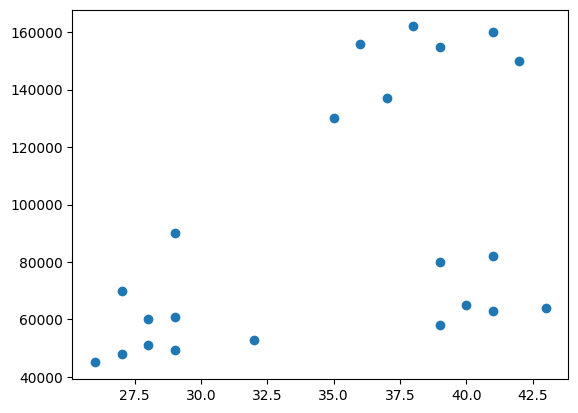

In [7]:
import matplotlib.pyplot as plt 

plt.scatter(df['Age'], df['Income'])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income'] = scaler.fit_transform(df[['Income']])
df['Age'] = scaler.fit_transform(df[['Age']])
df


,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [9]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

kmean = KMeans(n_clusters=3)
y_pred = kmean.fit_predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [10]:
df['cluster'] = y_pred

In [11]:
kmean.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [12]:
cluster0 = df[df['cluster']==0]
cluster1= df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

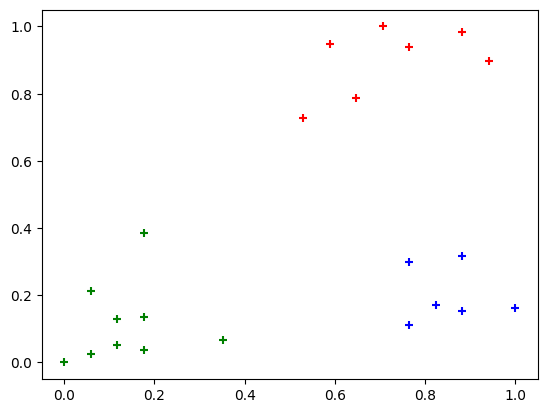

In [13]:
plt.scatter(cluster0['Age'], cluster0['Income'], color = 'r', marker= '+')
plt.scatter(cluster1['Age'], cluster1['Income'], color = 'g', marker= '+')
plt.scatter(cluster2['Age'], cluster2['Income'], color = 'b', marker= '+')

In [15]:
sse = []

for i in range(1,10):
    km = KMeans(n_clusters= i)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.21055478995472496,
 0.1685851223602976,
 0.1397684499538816,
 0.10629897421405131]

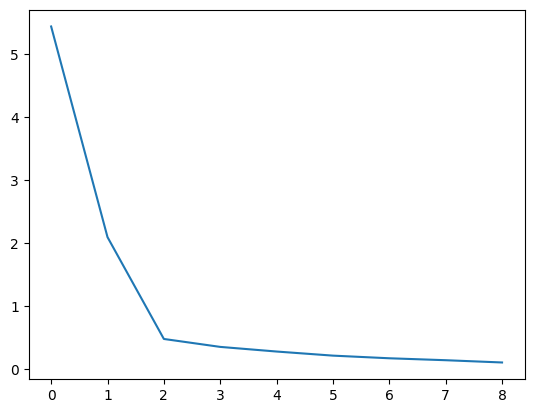

In [18]:
plt.plot(sse)